In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

!pip3 install kmeans1d
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



#know we should import yfinance library to extract our bitcoin datas




In [20]:
!pip install  yfinance 
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe using pandas_datareader
data = pdr.get_data_yahoo("BTC-USD", start="2016-01-01", end="2022-5-8")
#BTC-USD
#GC=F
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


#Here we are calculateing Return rate

In [21]:
# Identify the Price variance for the each days
# Return = (Close price minus the Open price)/open price 
# Negative value indicate price has declined for that day and Positive value represent increase in price

data['Return'] = ((data["Close"] - data["Open"])/data["Open"])*100

print (data.head(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   
2016-01-06  431.855988  431.855988  426.341003  429.105011  429.105011   
2016-01-07  430.010986  458.765991  429.076996  458.048004  458.048004   
2016-01-08  457.537994  462.933990  447.937988  453.230011  453.230011   
2016-01-09  453.382996  454.640015  446.889008  447.610992  447.610992   
2016-01-10  448.238007  448.308990  440.351013  447.990997  447.990997   

              Volume    Return  
Date                            
2016-01-01  36278900  0.838828  
2016-01-02  

# know we are clustering bitcoins return rat data

In [22]:
import kmeans1d

k = 3

clusters, centroids = kmeans1d.cluster(data['Return'], k)

print(clusters)  
print(centroids) 

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [23]:
data['clusters']= clusters

data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,clusters
Date,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,0.838828,1
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.272425,1
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.822693,1
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.704551,1
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.256081,1


# but we can see that these tree clusters are imbalance and if we want to solve this problem we have some solutions, I will explain it in third mini_project

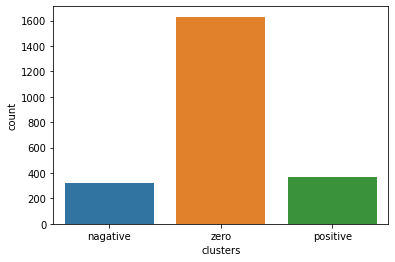

In [24]:
# visualize the target variable

g = sns.countplot(data['clusters'])
g.set_xticklabels(['nagative','zero','positive'])
plt.show()